In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud


plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/datasets/imdb.txt')
imdb.head()

,class,clean_text
0,0,slow moving aimless movie distressed drifting ...
1,0,not sure lost flat characters audience nearly ...
2,0,attempting artiness black white clever camera ...
3,0,little music anything speak
4,1,best scene movie gerardo trying find song keep...


In [ ]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

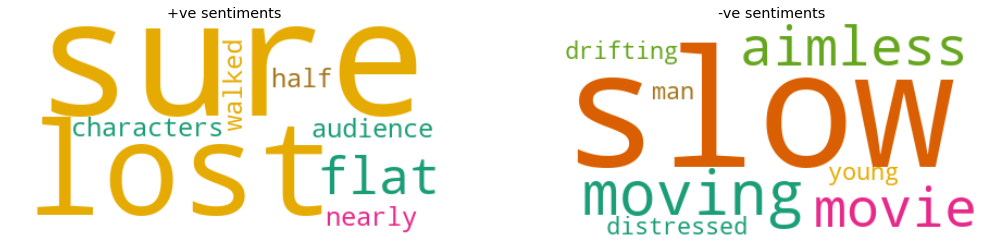

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(121)
wc.generate(imdb.clean_text[1])
plt.title('+ve sentiments')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(122)
wc.generate(imdb.clean_text[0])
plt.title('-ve sentiments')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

In [ ]:
# split data
X = imdb['clean_text'].values
y = imdb['class'].values

In [ ]:
# train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Train set: (522,)
Test set: (224,)


# Applying KNN brute force on B0W

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

# fit has to happen only on train data
vectorizer.fit(X_train)

# transform
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)




print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
vectorizer = CountVectorizer()
x_train_bow = vectorizer.fit_transform(X_train)
x_test_bow = vectorizer.fit_transform(X_test)

print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")

Before vectorizations
(522,) (522,)
(224,) (224,)
After vectorizations
(522, 2193) (522,)
(224, 2193) (224,)
YOU SHOULD NOT DO SOMETHING LIKE THIS
(522, 2193) (522,)
(224, 1353) (224,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


<pre>
<h2> <font color='#932432'>YOU SHOULD NOT DO LIKE THIS </font></h2>
1.  <font color='#DE354C'>THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA</font>
    vectorizer = CountVectorizer()
    x_train_bow = vectorizer.fit_transform(X_train)
    x_test_bow = vectorizer.fit_transform(X_test)
    
2.  <font color='#DE354C'>DATA LEAKAGE PROBLEM: IF WE DO LIKE THIS WE ARE LOOKING AT THE TEST DATA BEFORE MODELING</font>
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transfomr(X)
    X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.3)
   
3. <font color='#DE354C'>YOU SHOULD PASS THE PROBABILITY SCORES NOT THE PREDICTED VALUES</font>
    y_pred =  model.predict(X)
    roc_auc_score(y_test,y_pred)


</pre>

<h2> <font color='#004E7C'>WHAT ARE THESE FUNCTIONS: FIT, TRANSFORM, FIT_TRANSFORM</font></h2>

In [ ]:
sentance = ["abc def pqr", "abc pqr cdf jkl cdf"]
example = CountVectorizer()
example.fit(sentance)
# after this statement the example will build the vocabulary with all the unique words
# you should call this function only after fit() 
print(example.vocabulary_) # this will return a dict object, words as key and the occurence as value
print('='*50)

# to convert the sentance into numerical vectors, we will call transform()
# the first feature name will corresponds to first column in transformed matrix
# the 2nd feature name will corresponds to 2nd column in transformed matrix
print(example.get_feature_names())
print(example.transform(sentance).toarray())
# "abc" will corresponds to first colum
# "cdf" will corresponds to 2nd column

{'abc': 0, 'def': 2, 'pqr': 4, 'cdf': 1, 'jkl': 3}
['abc', 'cdf', 'def', 'jkl', 'pqr']
[[1 0 1 0 1]
 [1 2 0 1 1]]


<pre>

When you do
<i><font color='#004E7C'>vec =  CountVectorizer()</font></i>

then it will initiate the <i><font color='#004E7C'>CountVectorizer</font></i> with default parameters.

<i><font color='#004E7C'>vec.fit(Train_text)</font></i>: Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

<i><font color='#004E7C'>bag_of_words = vec.transform(Train_text)</font></i>: Means it is applying that learned parameters (vocabulary) to the data and thus giving you output i.e. words in Bag of words formate. 

Now, as you should know that the  <i>vocabulary(unique n-grams)</i> can be different for <i>Train Text</i> and <i>Test Text</i> thus they will give you different dimensional matrices for Train and Test. 

So what you should do is -  <i><font color='#004E7C'>vec = CountVectorizer()</font></i>, <i><font color='#004E7C'>vec.fit(Train_text)</font></i>

which learns the vocabulary of <i>Train Text</i> and then apply or transform your both <i>Train Text</i> and <i>Test Text</i>  using that  
learned vocabulary to ensure the same dimensions for both of them by doing -

<i><font color='#004E7C'>bag_of_words_train = vec.transform(Train_text)</font></i>
and
<i><font color='#004E7C'>bag_of_words_test = vec.transform(Test_text)</font></i>


so to conclude

<i><font color='#004E7C'>
model =  CountVectorizer()
model.fit(train_text)
train_bow = model.transform(train_text)
test_bow = model.transform(test_text) 
</font></i>

or 
   
<i><font color='#004E7C'>
model =  CountVectorizer()
train_bow = model.fit_transform(train_text)
test_bow = model.transform(test_text) 
</font></i>


</pre>

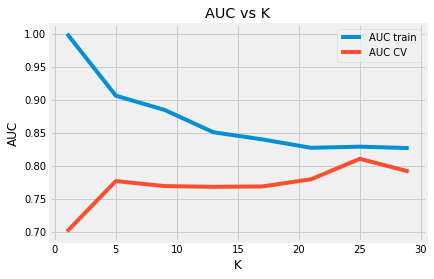

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

auc_cv=[]
auc_train=[]
K=list(range(1,30,4))
cv_scores=[]

for i in K:
    model = KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
    model.fit(X_train_bow, y_train)
    pred = model.predict_proba(X_test_bow)[:,1]
    auc_cv.append(roc_auc_score(y_test,pred))
    pred1=model.predict_proba(X_train_bow)[:,1]
    auc_train.append(roc_auc_score(y_train,pred1)) 

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

--- 
From the error plot we choose k such that, we will have **maximum AUC** on cv data and **gap** between the train and cv is **less**  

Note: based on the method you use you might get different hyperparameter values as best one, so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time.  

Here we are choosing the best_k based on forloop results, k = 25

In [ ]:
from sklearn.model_selection import GridSearchCV


model = KNeighborsClassifier()
K = list(range(1,30,4))

parameters = {
    'n_neighbors': K,
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
    }

grid = GridSearchCV(model, parameters, cv=10, scoring='roc_auc')
grid.fit(X_train_bow, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'cosine'],
                         'n_neighbors': [1, 5, 9, 13, 17, 21, 25, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
print(f"Best score: {grid.best_score_ * 100.0}%")
print(f"best parameters: {grid.best_params_}")

Best score: 77.32746000438307%
best parameters: {'metric': 'cosine', 'n_neighbors': 25}


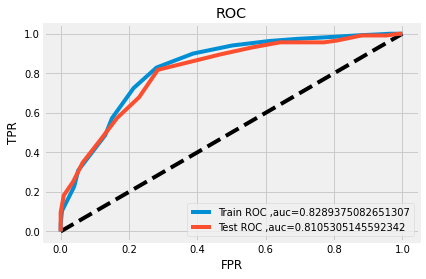

In [ ]:
# ROC curve for k=25
# from above statistics we take k=25 as our best hyperparameter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

model = KNeighborsClassifier(n_neighbors=25,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
model.fit(X_train_bow, y_train)
predi = model.predict_proba(X_test_bow)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, predi)
pred = model.predict_proba(X_train_bow)[:,1]
fpr2,tpr2,thresholds2= roc_curve(y_train,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot([0,1],[0,1],'k--')
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

In [ ]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#let us get the predictions using the classifier we had fit above
print("Train confusion matrix")
print(confusion_matrix(y_train, model.predict(X_train_bow)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model.predict(X_test_bow)))

Train confusion matrix
[[199  54]
 [ 74 195]]
Test confusion matrix
[[84 25]
 [37 78]]


In [ ]:
# Confusion matrix can also be obtained using crosstab method of pandas.
y_bow_pred = model.predict(X_test_bow)
pd.crosstab(y_test, y_bow_pred, rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,0,1,All
Predicted,,,
0,84,25,109
1,37,78,115
All,121,103,224


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_bow_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       109
           1       0.76      0.68      0.72       115

    accuracy                           0.72       224
   macro avg       0.73      0.72      0.72       224
weighted avg       0.73      0.72      0.72       224



# Applying KNN kd-tree on TF-IDF

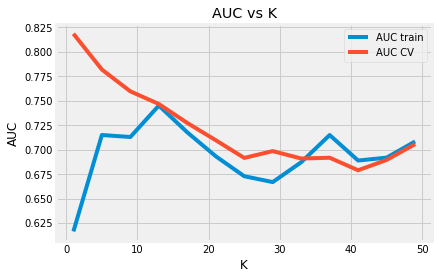

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=10, max_features=500)

X_train_tfidf = tf_idf_vect.fit_transform(X_train)
X_test_tfidf = tf_idf_vect.transform(X_test)

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

auc_cv=[]
auc_train=[]
K=[]

for i in range(1, 50, 4):
  model = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
  model.fit(X_train_tfidf, y_train)
  pred = model.predict_proba(X_train_tfidf)[:,1]
  pred1 = model.predict_proba(X_test_tfidf)[:,1]
  auc_cv.append(roc_auc_score(y_train,pred))
  auc_train.append(roc_auc_score(y_test,pred1))
  K.append(i)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

In [ ]:
model = KNeighborsClassifier()
K = list(range(1,50,4))

parameters = {
    'n_neighbors': K,
    # 'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
    }

grid = GridSearchCV(model, parameters, cv=10, scoring='roc_auc')
grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37,
                                         41, 45, 49]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
print(f"Best score: {grid.best_score_ * 100.0}%")
print(f"best parameters: {grid.best_params_}")

Best score: 65.58698224852071%
best parameters: {'n_neighbors': 13}


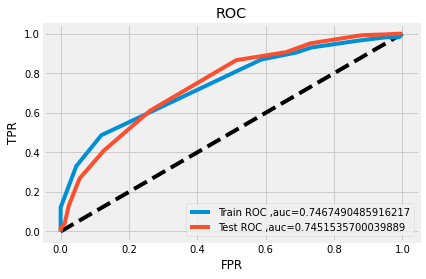

In [ ]:
model = KNeighborsClassifier(n_neighbors=13, algorithm='kd_tree')
model.fit(X_train_tfidf,y_train)

predi = model.predict_proba(X_test_tfidf)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, predi)

pred = model.predict_proba(X_train_tfidf)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_train, pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot([0,1],[0,1],'k--')
ax.plot(fpr1, tpr1, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
ax.plot(fpr2, tpr2, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()



In [ ]:
# Confusion matrix
y_tfidf_pred = model.predict(X_test_tfidf)
pd.crosstab(y_test, y_tfidf_pred, rownames=['Predicted'], colnames=['Actual'], margins=True)

Actual,0,1,All
Predicted,,,
0,82,27,109
1,47,68,115
All,129,95,224


In [ ]:
print(classification_report(y_test, y_tfidf_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       109
           1       0.72      0.59      0.65       115

    accuracy                           0.67       224
   macro avg       0.68      0.67      0.67       224
weighted avg       0.68      0.67      0.67       224



# Applying K-NN brute force on AVG Word2Vec(W2V)

In [ ]:
# Preparing Reviews for gensim model
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

# Training w2v model
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# this line of code trains w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  185
sample words  ['really', 'feeling', 'though', 'however', 'no', 'acting', 'work', 'things', 'camera', 'movie', 'play', 'good', 'cool', 'make', 'budget', 'bad', 'every', 'family', 'characters', 'plot', 'real', 'script', 'character', 'strong', 'give', 'understand', 'everything', 'thing', 'worse', 'one', 'well', 'much', 'not', 'seen', 'recommend', 'portrayal', 'saw', 'short', 'film', 'absolutely', 'loved', 'cinematography', 'funny', 'performance', 'white', 'garbage', 'even', 'show', 'would', 'totally']


In [ ]:
# Converting Reviews into Numerical Vectors using W2V vectors
# Algorithm: Avg W2V

from tqdm import tqdm

# Converting Train data text
# average Word2Vec
# compute average word2vec for each review.

sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review

    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1

    if cnt_words != 0:
        sent_vec /= cnt_words
        
    sent_vectors.append(sent_vec)
    
sent_vectors_train = np.array(sent_vectors)
print()
print(sent_vectors_train.shape)
print(sent_vectors_train[0])

100%|██████████| 522/522 [00:00<00:00, 12595.22it/s]


(522, 50)
[ 1.24696045e-03 -3.08775075e-03 -6.64576888e-03  4.91523065e-03
 -3.32196817e-03  6.56513959e-03  5.06039321e-04  6.12487240e-04
 -3.57576638e-03  7.48314972e-04 -2.38409514e-03  1.99084046e-03
  1.51435949e-03  9.63515253e-04  2.27802918e-03  6.47105152e-03
  2.23050536e-03 -1.36236680e-03 -3.91317549e-03  1.81449211e-03
 -4.45760168e-03  2.99213382e-03 -1.44491570e-03  2.33523645e-04
  1.60429739e-03 -4.35844972e-03 -2.63170180e-03 -5.19984708e-03
  1.53736386e-03  8.20418913e-03 -7.55724191e-03 -6.74958186e-05
  4.53366192e-03  2.84615846e-04 -1.79486202e-03  9.41843539e-03
  5.02014921e-04 -4.87169872e-03 -3.93369608e-03  6.80588483e-04
  8.43810538e-04 -3.77863568e-04  1.52784491e-03  3.42248460e-03
  1.35722959e-03 -4.41704659e-03  1.97666232e-03 -3.58407254e-03
  5.17397708e-03  5.84097121e-03]


In [ ]:
# Converting Test data text
i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.

sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review

    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1

    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
    
sent_vectors_test = np.array(sent_vectors_test)

print()
print(sent_vectors_test.shape)
print(sent_vectors_test[0])

100%|██████████| 224/224 [00:00<00:00, 12172.52it/s]


(224, 50)
[ 2.55181256e-03  8.67307815e-03 -3.53315938e-03  7.07940361e-03
 -2.83625245e-03  3.24161816e-03  2.07962818e-03  7.22356606e-04
 -4.95350570e-04 -3.08273092e-03  2.95014819e-04 -1.33865516e-03
  2.08653766e-03 -6.21407933e-03 -3.71247402e-03  6.71317379e-03
  6.71854871e-03  4.30392928e-03  8.97425081e-04 -2.14824558e-03
 -3.11213906e-03  5.77607402e-03  3.27613484e-03  7.45934667e-04
  1.28905056e-03 -6.59941370e-03 -3.49686574e-03 -3.28751924e-03
  1.07601169e-02  7.69073470e-03 -3.66990559e-03 -8.68535973e-03
  7.78355554e-03  2.01797474e-03 -8.68686475e-04  5.54612442e-03
  1.01087335e-03 -4.54399607e-03 -9.35350568e-03 -6.50229258e-03
  3.12183890e-03 -5.76638966e-04  2.15500110e-03 -1.91839546e-03
  3.87218315e-05  6.43907115e-04  3.02674095e-03 -2.71951873e-03
 -1.29447067e-02 -1.12780166e-04]


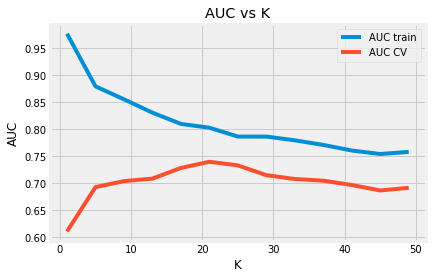

In [ ]:
# applying knn on avg W2Vec

X_tr_w2 = sent_vectors_train

X_test_w2 = sent_vectors_test

auc_cv=[]
auc_train=[]
K=[]
for i in range(1,50,4):
    model = KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
    model.fit(X_tr_w2, y_train)

    pred = model.predict_proba(X_test_w2)[:,1]
    pred1 = model.predict_proba(X_tr_w2)[:,1]
    auc_cv.append(roc_auc_score(y_test,pred))
    auc_train.append(roc_auc_score(y_train,pred1))
    K.append(i)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

In [ ]:
model = KNeighborsClassifier()

parameters = {
    'n_neighbors': K,
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
    }

grid = GridSearchCV(model, parameters, cv=10, scoring='roc_auc')
grid.fit(X_tr_w2, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'cosine'],
                         'n_neighbors': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37,
                                         41, 45, 49]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
print(f"Best score: {grid.best_score_ * 100.0}%")
print(f"best parameters: {grid.best_params_}")

Best score: 74.527580539119%
best parameters: {'metric': 'cosine', 'n_neighbors': 9}


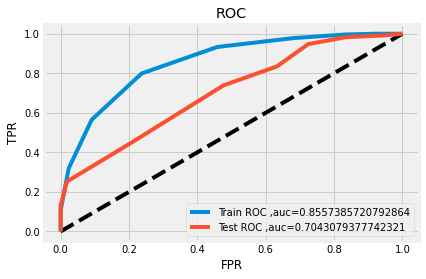

In [ ]:
# ROC curve for k=9
# from above statistics we take k=9 as our best hyperparameter

model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='brute', metric='cosine')
model.fit(X_tr_w2,y_train)

predi = model.predict_proba(X_test_w2)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, predi)

pred = model.predict_proba(X_tr_w2)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot([0,1],[0,1],'k--')
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

# Conclusion

In [ ]:
from prettytable import PrettyTable 

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter", "AUC"]

x.add_row(["B0W", "Brute", 25, 0.810])
x.add_row(["TF-IDF", "KD-Tree", 13, 0.745])
x.add_row(["Avg-W2V", "Brute", 9, 0.704])

print(x)

+------------+---------+-------------+-------+
| Vectorizer |  Model  | Hyperameter |  AUC  |
+------------+---------+-------------+-------+
|    B0W     |  Brute  |      25     |  0.81 |
|   TF-IDF   | KD-Tree |      13     | 0.745 |
|  Avg-W2V   |  Brute  |      9      | 0.704 |
+------------+---------+-------------+-------+
